In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [2]:
data = pd.read_csv("../data/StockX-Data-Consolidated.csv")

In [12]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 33 columns):
Unnamed: 0            99956 non-null int64
Sale Price            99956 non-null float64
Pct_change            99956 non-null float64
Days Since Release    99956 non-null float64
yeezy                 99956 non-null int64
airjordan             99956 non-null int64
airforce              99956 non-null int64
airmax90              99956 non-null int64
airmax97              99956 non-null int64
presto                99956 non-null int64
vapormax              99956 non-null int64
blazer                99956 non-null int64
zoom                  99956 non-null int64
react                 99956 non-null int64
California            99956 non-null int64
New York              99956 non-null int64
Oregon                99956 non-null int64
Florida               99956 non-null int64
Texas                 99956 non-null int64
Other States          99956 non-null int64
size_freq             999

## EDA on Target Value

In [15]:
y = pd.DataFrame(data[['Pct_change']])
x = data.loc[:, ~data.columns.isin(['Pct_change'])]

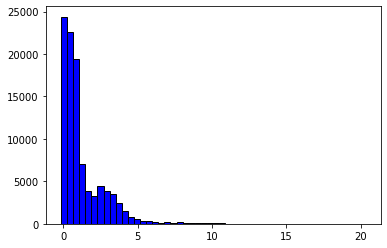

In [16]:
plt.hist(y['Pct_change'], color = 'blue', edgecolor = 'black',
         bins = 50)
plt.show()

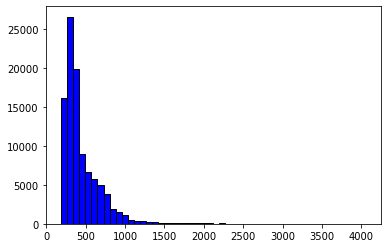

In [17]:
plt.hist(x['Sale Price'], color = 'blue', edgecolor = 'black',
         bins = 50)
plt.show()

## EDA on Y using voilin plot and box plot

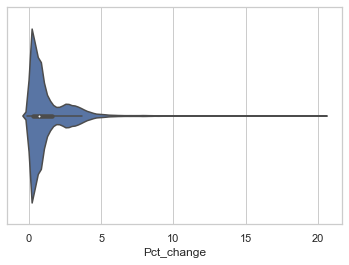

In [18]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=y['Pct_change'])

## Train an Isolation Forest on log(Y)

In [19]:
model=IsolationForest(n_estimators=100, max_samples='auto', contamination= 0.05 ,max_features=1.0)
model.fit(y[['Pct_change']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.05,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [20]:
y['scores']=model.decision_function(y[['Pct_change']])
y['anomaly']=model.predict(y[['Pct_change']])

## Print Anomoly Datapoints

In [21]:
anomaly=y.loc[y['anomaly']==-1]
anomaly_index=list(anomaly.index)

In [22]:
anomaly[0:19]

,Pct_change,scores,anomaly
73,4.281818,-0.010788,-1
112,5.150000,-0.080391,-1
128,9.000000,-0.195926,-1
129,5.812500,-0.107520,-1
130,7.400000,-0.154906,-1
131,7.281250,-0.155905,-1
132,6.200000,-0.123060,-1
149,11.894737,-0.244807,-1
150,11.236842,-0.239227,-1
151,4.312500,-0.009584,-1


In [23]:
mean = np.array([[np.mean(y['Pct_change']),np.mean(y.loc[y['anomaly']==1]['Pct_change']),np.mean(anomaly['Pct_change'])]])
median = np.array([[np.median(y['Pct_change']),np.median(y.loc[y['anomaly']==1]['Pct_change']),np.median(anomaly['Pct_change'])]])
comp = pd.DataFrame(index = ['mean','median'],columns= ['whole','normal','anamaly'])
comp.iloc[0] = mean
comp.iloc[1] = median

In [24]:
comp

,whole,normal,anamaly
mean,1.24824,1.04009,5.43429
median,0.704545,0.681818,5.05263


In [25]:
y['scores']=model.decision_function(y[['Pct_change']])
y['anomaly']=model.predict(y[['Pct_change']])

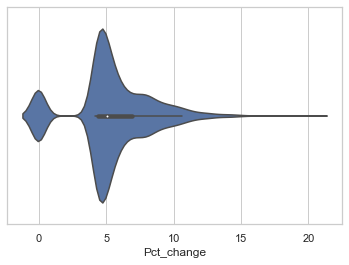

In [26]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=anomaly["Pct_change"])

## Compare group and the anomaly

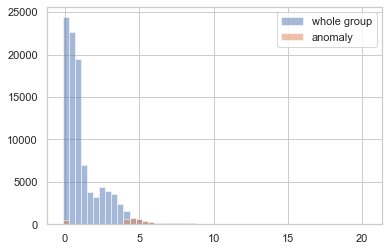

In [27]:
plt.hist(y['Pct_change'], bins = 50, label = 'whole group', alpha = 0.5)
plt.hist(anomaly['Pct_change'], bins = 50, label = 'anomaly', alpha = 0.5)
plt.legend(loc = "best")
plt.show()

## Explore Anomaly Points

In [ ]:
anomaly_data = data[data.index.isin(anomaly_index)]

In [38]:
## Get brand, region and color count in the dataset
def get_brand(row):
    for brand in data.columns[4:14]:
        if row[brand] == 1:
            return brand
def get_region(row):
    for region in data.columns[14:20]:
        if row[region] == 1:
            return region
def get_col(row):
    for color in data.columns[21:32]:
        if row[color] == 1:
            return color

In [40]:
anomaly_data['brand'] = anomaly_data.apply(get_brand, axis=1)
anomaly_data['region'] = anomaly_data.apply(get_region, axis=1)
anomaly_data['color'] = anomaly_data.apply(get_col, axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

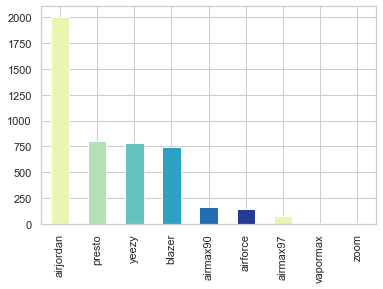

In [48]:
anomaly_data.brand.value_counts().plot(kind = 'bar',color = sns.color_palette("YlGnBu"))

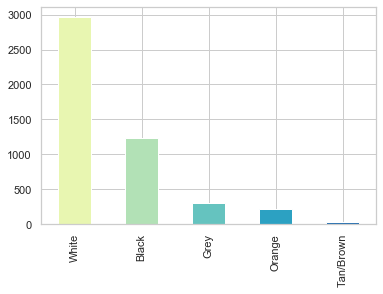

In [49]:
anomaly_data.color.value_counts().plot(kind = 'bar',color = sns.color_palette("YlGnBu"))

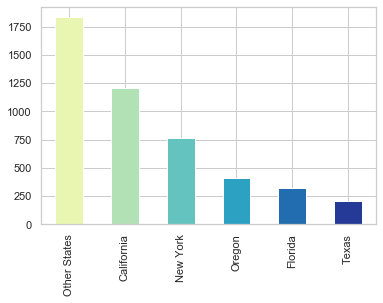

In [50]:
anomaly_data.region.value_counts().plot(kind = 'bar',color = sns.color_palette("YlGnBu"))

# EDA on feature variables

### EDA on Timing features

In [51]:
## group brand, region and color variables
data['week_since_release'] = (data['Days Since Release']/7).round(1)
data['brand'] = data.apply(get_brand, axis=1)
data['region'] = data.apply(get_region, axis=1)
data['color'] = data.apply(get_col, axis=1)

In [52]:
# create a new dataframe on grouped input features
timing = data[['Days Since Release',"week_since_release",'region', "brand",'color','Pct_change']]
timing = timing.rename(columns = {'Days Since Release':"days_since_release"})

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


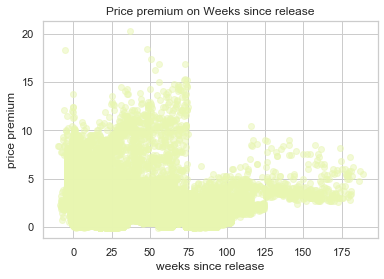

In [53]:
# explore price premium change throughout weeks
np.random.seed(19680801)
N = 99956
#colors = np.random.rand(N)
cmap1 = sns.color_palette("YlGnBu")
plt.scatter(timing['week_since_release'],timing['Pct_change'], c = cmap1[0],alpha=0.5)
plt.title('Price premium on Weeks since release')
plt.xlabel('weeks since release')
plt.ylabel('price premium')
plt.show()

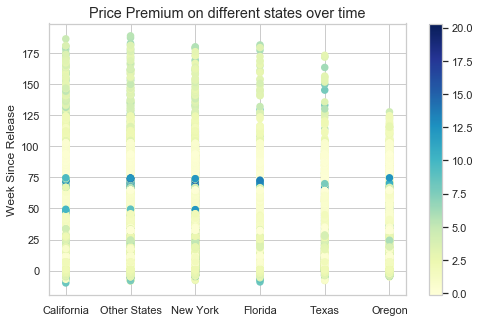

In [54]:
# Price Premium on different states over time
fig, ax = plt.subplots(figsize = (8,5))
sc = ax.scatter(timing.region,timing.week_since_release, c=timing.Pct_change,linewidths = 1.5, cmap="YlGnBu")
fig.colorbar(sc, ax=ax)
plt.ylabel('Week Since Release')
plt.title('Price Premium on different states over time', fontsize = 'large')
plt.show()

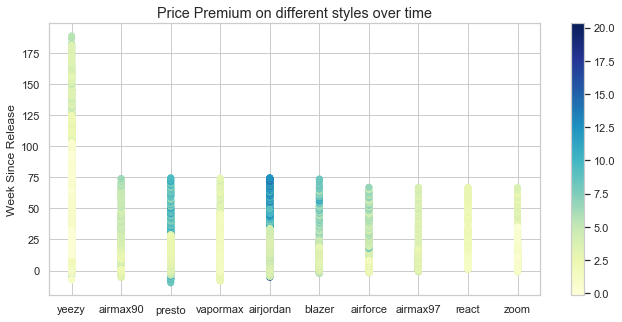

In [55]:
## Price Premium on different styles over time
fig, ax = plt.subplots(figsize = (11,5))
sc = ax.scatter(timing.brand,timing.week_since_release, c=timing.Pct_change,  cmap="YlGnBu")
fig.colorbar(sc, ax=ax)
plt.ylabel('Week Since Release')
plt.title('Price Premium on different styles over time', fontsize = 'large')
plt.show()

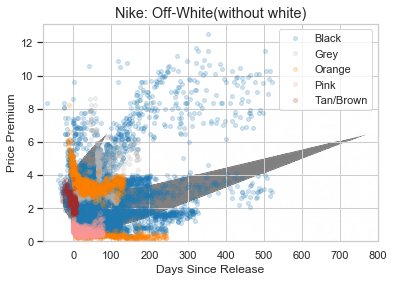

In [56]:
# explore those heavy weighted features in anomaly points
#first group data by their brands
offwhite= timing.loc[timing['brand'] != 'yeezy']
#since white is heavily weighted, we explore color effect by first
#excluding white color
ow_nowhite = offwhite.loc[offwhite['color'] != 'White']
ow_white = offwhite.loc[offwhite['color'] == 'White']
ow_color = ow_nowhite.groupby(['color'])
img = plt.imread('../data/media/nike.jpg')
# Plot
fig, ax = plt.subplots()
ax.imshow(img, aspect='auto', extent=(-80, 800, 0, 8), zorder=-1,alpha = 0.5)
ax.yaxis.tick_left()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
cmap1 = sns.color_palette("Paired")
cmap2 =  sns.color_palette("Set2")
colors = [cmap1[1],cmap2[-1],cmap1[7],cmap1[4],'brown']
for i, (name, group) in enumerate(ow_color):
    ax.plot(group.days_since_release, group.Pct_change, marker='o', linestyle='', 
            c = colors[i], ms=4, label=name, alpha = 0.2)

# ax.spines['bottom'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.spines['left'].set_color('white')
# ax.yaxis.label.set_color('white')
# ax.tick_params(axis='y', colors='white')
#ax.patch.set_visible(False)                
        
plt.title('Nike: Off-White(without white)', fontsize = 'large')
plt.xlabel('Days Since Release', )
plt.ylabel('Price Premium')
plt.legend()
plt.show()

In [57]:
offwhite['brand'].value_counts(sort=True, ascending=False, bins=None, dropna=True)

airjordan    5703
presto       4363
zoom         4317
blazer       3622
vapormax     3429
airforce     2486
airmax90     1998
airmax97     1392
react         484
Name: brand, dtype: int64

### Explore Top 3 Most-Selling Nike Sneakers

In [60]:
## Nike Off white
aj = offwhite.loc[offwhite['brand'] == 'airjordan']
aj_color = aj.groupby(['color'])
presto = offwhite.loc[offwhite['brand'] == 'presto']
presto_color = presto.groupby(['color'])
zoom = offwhite.loc[offwhite['brand'] == 'zoom']
zoom_color = zoom.groupby(['color'])
blazer = offwhite.loc[offwhite['brand'] == 'blazer']
blazer_color = blazer.groupby(['color'])
af = offwhite.loc[offwhite['brand'] == 'airforce']
af_color = af.groupby(['color'])

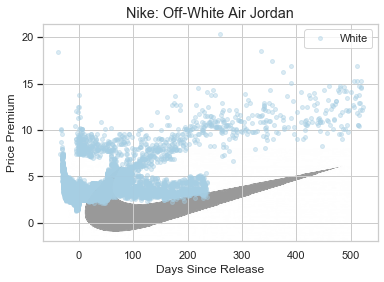

In [61]:
# Explore airjordan subbrand in Nike
# AJ Plot
fig, ax = plt.subplots()
ax.imshow(img, aspect='auto', extent=(-20, 500, -2, 8), zorder=-1,alpha = 0.4)
ax.yaxis.tick_left()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
cmap1 = sns.color_palette("Paired")
cmap2 =  sns.color_palette("Set2")
colors = [cmap1[0],cmap2[-1],cmap1[7],cmap1[4],'brown']
for i, (name, group) in enumerate(aj_color):
    ax.plot(group.days_since_release, group.Pct_change, marker='o', linestyle='', 
            c = colors[i], ms=4, label=name, alpha = 0.4)

plt.title('Nike: Off-White Air Jordan', fontsize = 'large')
plt.xlabel('Days Since Release')
plt.ylabel('Price Premium')

plt.legend()
plt.show()

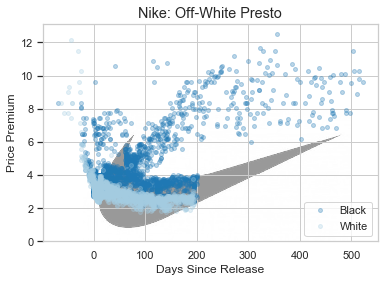

In [62]:
# Presto Plot
fig, ax = plt.subplots()
ax.imshow(img, aspect='auto', extent=(-20, 500, 0, 8), zorder=-1,alpha = 0.4)
ax.yaxis.tick_left()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
cmap1 = sns.color_palette("Paired")
cmap2 =  sns.color_palette("Set2")
colors = [cmap1[1],cmap1[0],cmap1[7],cmap1[4],'brown']
for i, (name, group) in enumerate(presto_color):
    ax.plot(group.days_since_release, group.Pct_change, marker='o', linestyle='', 
            c = colors[i], ms=4, label=name, alpha = 0.3)

plt.title('Nike: Off-White Presto', fontsize = 'large')
plt.xlabel('Days Since Release')
plt.ylabel('Price Premium')

plt.legend()
plt.show()

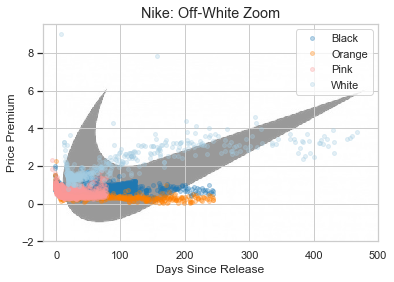

In [63]:
# Zoom Plot
fig, ax = plt.subplots()
ax.imshow(img, aspect='auto', extent=(-20, 500, -2, 8), zorder=-1,alpha = 0.4)
ax.yaxis.tick_left()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
cmap1 = sns.color_palette("Paired")
cmap2 =  sns.color_palette("Set2")
colors = [cmap1[1],cmap1[7],cmap1[4],cmap1[0]]
for i, (name, group) in enumerate(zoom_color):
    ax.plot(group.days_since_release, group.Pct_change, marker='o', linestyle='', 
            c = colors[i], ms=4, label=name, alpha = 0.3)

plt.title('Nike: Off-White Zoom', fontsize = 'large')
plt.xlabel('Days Since Release')
plt.ylabel('Price Premium')

plt.legend()
plt.show()

### Explore Yeezy Sneakers

In [64]:
yeezy= timing.loc[timing['brand'] == 'yeezy']
img2 = plt.imread('../data/media/yeezy.jpg')
yeezy_color = yeezy.groupby(['color'])

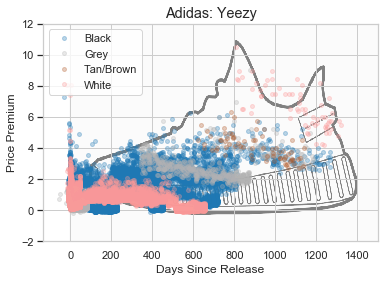

In [68]:
# Plot
fig, ax = plt.subplots()
ax.imshow(img2, aspect='auto', extent=(-5, 1500, -2, 12), zorder=-1,alpha = 0.5)
ax.yaxis.tick_left()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
cmap1 = sns.color_palette("Paired")
cmap2 =  sns.color_palette("Set2")
colors = [cmap1[1],cmap2[-1],cmap1[-1],cmap1[4],cmap1[0]]
for i, (name, group) in enumerate(yeezy_color):
    ax.plot(group.days_since_release, group.Pct_change, marker='o', linestyle='', 
            c = colors[i], ms=4, label=name, alpha = 0.3)

plt.title('Adidas: Yeezy', fontsize = 'large')
plt.xlabel('Days Since Release')
plt.ylabel('Price Premium')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


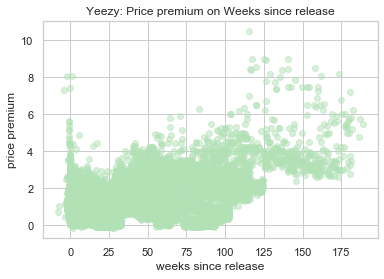

In [66]:
np.random.seed(19680801)



plt.scatter(x = yeezy['week_since_release'], y = yeezy['Pct_change'], c=sns.color_palette("YlGnBu")[1], alpha=0.5)
plt.title('Yeezy: Price premium on Weeks since release')
plt.xlabel('weeks since release')
plt.ylabel('price premium')
plt.show()

## Explore Region